<a href="https://colab.research.google.com/github/Emanuel-Nguyen/PortfolioProjects/blob/main/MLPrj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
# step 1: configuring the project, what is that means?
"""Configuring the project means setting up the project in Google Cloud Platform. This includes creating a project, enabling the necessary APIs, and creating a service account."""

In [ ]:
!pip install -r requirement.txt
# MY GOSH, THE PROCESS OF INSTALLING THE LIBRARY IS SO STRUGGLE,
# different types of versions, TOO old, CONFLICT VERSIONS,......
#swtf its take so lo,nggg man it is Building wheels for collected packages: numpy

In [ ]:
# step 2: Importing he mnist dataset, the dataset is provided b the tensrflow library
#mnist dataset is the collection of many pictures of handwriting digits
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.optimizers import Adam


In [ ]:
import pandas as pd

In [ ]:


# Load the MNIST dataset
mnist, info = tfds.load('mnist', split='train', shuffle_files=True, with_info=True)

# Print the information
print(info)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1.incomplete25UUBF',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      

In [ ]:
# look at some example
# becasue it is image so need to nstall matpotlob
import matplotlib.pyplot as plt

<_TakeDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


(28, 28, 1)
tf.Tensor(4, shape=(), dtype=int64)


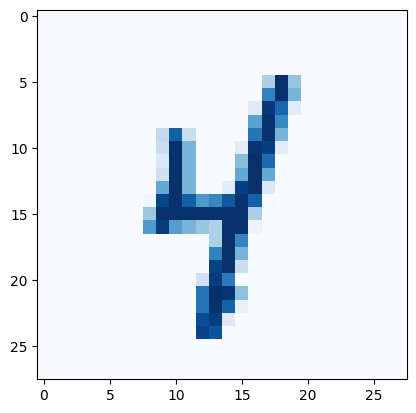

In [ ]:


# Take one example from the dataset
for example in mnist.take(1):
  # take is oto limit the number of picture
    image, label = example['image'], example['label']

    # Print the shape of the image and the label
    print(image.shape)

    print(label)
    #this will print the guess digit,....
    # Display the image
    plt.imshow(image.numpy()[:, :, 0], cmap='Blues')
    #this to play the image
    plt.show()
    #this one os to play the figures created my imshow

In [ ]:
n_input = 784 # input layer (28x28 pixels)
n_hidden1 = 512 # 1st hidden layer
n_hidden2 = 256 # 2nd hidden layer
n_hidden3 = 128 # 3rd hidden layer
n_output = 10 # output layer (0-9 digits)

In [ ]:
# now lets buuild the neuron network architecture
learning_rate = 1e-4
#the speed to learn, if too fast you can get the not so good prediction, of too slow it taks a lot of time
n_iterations = 1000
#is the numer of time that the model goes through the entire models
#too small: not learn enough from date,
#too lage too depend on data-> overfiting
batch_size = 128
#the number of inout( example) that model analyst at a time, because computer can handle parelell
dropout = 0.5
# the rate that a unit be left outside furing the trainsings
#to avoid being affected too much by a specific units

In [ ]:
#building tensor flowgraph
input_shape = (None, n_input)
#to determine the dimentions of data that modlal can handle
#the sharpe have to be specified because it affets the model architecture.
output_shape = (None, n_output)

# Use tf.keras.Input to create input tensors
x = tf.keras.Input(shape=input_shape, dtype=tf.float32)
y = tf.keras.Input(shape=output_shape, dtype=tf.float32)
#what are tensor: tensor is the data structure (as array) that store and tepresent data a sa a prcific shape(dimentio)

# For keep_prob, you can use a python variable instead of a placeholder
keep_prob = 0.5

In [ ]:
weights = {
    'w1': tf.Variable(tf.random.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.random.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.random.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.random.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}
#each w is matric of random number with the shar eis the sixe of 2 layers around


In [ ]:
biases = {

'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
#this create a dictionary of bias value of each neron layers, and the shaprdepenf on the number f ne
     #neuron for each,
}

In [ ]:


layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, rate=1-keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']


In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
#This line creates an instance of the Adam optimizer with a learning rate of 1e-4. The Adam optimizer is a popula
#r optimization algorithm that is used to train deep learning models.
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=y, logits=output_layer))
#crossentropy is used to evaluate the performance of model
train_step = optimizer.minimize(cross_entropy, var_list=None)


ValueError: `tape` is required when a `Tensor` loss is passed. Received: loss=KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.reduce_mean_13/Mean:0', description="created by layer 'tf.math.reduce_mean_13'"), tape=None.

ImportError: cannot import name 'AdamOptimizer' from 'tensorflow.keras.optimizers' (/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/optimizers/__init__.py)